In [1]:
import pandas as pd
import math
import json
import re
import numpy as np
import matplotlib.pyplot as plt
# import sys
from wordcloud import WordCloud
from PIL import Image
import datetime as dt


In [2]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str}, parse_dates=['created_at']
                 )


In [3]:
df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [4]:
# Filter dates
# https://www.codegrepper.com/code-examples/python/pandas+print+row+based+on+condition
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
start_date = '2014-11-12'
end_date = '2014-12-06'
mask = (df['created_at'] >= start_date) & (df['created_at'] < end_date)


In [5]:
df.loc[mask]


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [6]:
type(df["created_at"])


pandas.core.series.Series

In [7]:
len(df)


77307

In [8]:
df.dtypes


id_str                                    object
from_user                                 object
text                                      object
created_at                   datetime64[ns, UTC]
geo_coordinates                           object
user_lang                                 object
in_reply_to_user_id_str                   object
in_reply_to_screen_name                   object
from_user_id_str                          object
in_reply_to_status_id_str                 object
source                                    object
profile_image_url                         object
user_followers_count                       Int64
user_friends_count                         Int64
status_url                                object
entities_str                              object
specific_applications                     object
applications                              object
dtype: object

In [9]:
df = df.drop_duplicates()
df = df.dropna(axis=0, how='all')


In [10]:
reply_df = df[["in_reply_to_user_id_str",
               "in_reply_to_screen_name", "in_reply_to_status_id_str"]]


In [11]:
reply_df


,in_reply_to_user_id_str,in_reply_to_screen_name,in_reply_to_status_id_str
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
77302,NaN,NaN,NaN
77303,NaN,NaN,NaN
77304,NaN,NaN,NaN
77305,NaN,NaN,NaN


In [12]:
# reply
def isreply(tweet):
    if not pd.isna(tweet):

        print(tweet)


In [13]:
total_replies = df[pd.notna(df["in_reply_to_user_id_str"])]  # replies


In [14]:
len(total_replies.index)  # amount of replies


1724

In [15]:
# print all replies
replies = reply_df["in_reply_to_user_id_str"].map(isreply)


11348282
19442947
253536357
253536357
64643056
33602654
1691515789
19402238
529722897
2294593507
41333964
253536357
66162716
59220577
253536357
1273487113
253536357
17842366
26030180
24129206
14526045
21436960
1969346438
253536357
253536357
2232463302
1438925534
15808765
472670056
2590415228
254659730
17384099
177594666
46959037
32520240
443080433
412396499
208442526
86070159
21436960
253536357
253536357
253536357
253536357
208442526
35233873
376790816
404818828
14800111
622113
1266281
2294593507
372434360
329600057
972651
208442526
168090600
246693449
27650674
208442526
1941637627
43024906
86336234
208442526
19903360
2868449663
47306483
371152085
2894572724
106442779
208442526
364423298
253536357
43024906
85751142
208442526
4620451
3108351
41712825
75052666
5402612
2254751592
629637909
21584325
110462645
208442526
5402612
14606395
208442526
75052666
1041442471
119473816
1435461
208442526
229632990
75052666
34800396
32498911
18505048
208442526
208442526
129673790
75052666
114085696
673

428333
15117554
348955741
17384099
21436960
132649432
21436960
30845615
17384099
267659406
126302054
16839878
133247890
15599712
16380470
208442526
208442526
276006125
266641960
848870910
331475155
65479951
208442526
32480474
7109302
2277987787
123440736
29792943
190943447
1325162114
1372577988
59066390
208442526
133247890
17384099
1176805206
2097571
208442526
253536357
2860590142
208442526
208442526
253536357
746140256
2860590142
32480474
324096530
253536357
21168624
253536357
92762823
208442526
1618590241
299545425
65479951
208442526
368915372
253536357
15495464
75887588
237216383
20401442
2270640056
20836794
850229958
25188886
253536357
198494684
76906335
253536357
57880896
317313520
20521159
208442526
253536357
2860590142
253508578
19653925
5402612
2320839829
208442526
253536357
208442526
208442526
841386619
274360107
393608992
253536357
21436960
528937116
208442526
11348282
253536357
500543472
128622564
208442526
208442526
79414915
253536357
1397978796
607137149
17384099
21436960


In [16]:
raw_total_replies_df = df[pd.notna(df['in_reply_to_user_id_str'])]


In [17]:
raw_total_replies_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
29,540896030628532224,einfachbloggen,Congrats MT @NASA: #Orion's flying free for th...,2014-12-05 15:50:37+00:00,NaN,de,11348282,NASA,398268735,540891938275467000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5098209126...,191,199,http://twitter.com/einfachbloggen/statuses/540...,"{""hashtags"":[{""text"":""Orion"",""indices"":[19,25]...",Twitter for iPhone,Twitter
64,540776048414031872,gwittrapp,@nathanbroon last month you tagged 10 tweets w...,2014-12-05 07:53:51+00:00,NaN,en-gb,19442947,nathanbroon,1673116172,NaN,"<a href=""http://gwittr.com"" rel=""nofollow"">Gwi...",http://pbs.twimg.com/profile_images/3788000004...,139,531,http://twitter.com/gwittrapp/statuses/54077604...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Gwittr Writer,Gwittr Writer
108,540556460443594752,acolliver615,"@ESA_Rosetta keep sending pictures, they're ep...",2014-12-04 17:21:17+00:00,"loc: 39.2076777,-83.6107315",en,253536357,ESA_Rosetta,2260971996,540554322535534000,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/5329781788...,56,364,http://twitter.com/acolliver615/statuses/54055...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Android,Twitter
127,540488420062429185,WillemelliW,@ESA_Rosetta kan een puntje zuigen aan de vers...,2014-12-04 12:50:55+00:00,NaN,en,253536357,ESA_Rosetta,1201626438,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3283427317...,29,113,http://twitter.com/WillemelliW/statuses/540488...,"{""hashtags"":[{""text"":""OrionLaunch"",""indices"":[...",Twitter Web Client,Twitter
128,540482901624647682,Chapuler38,@RT_com @NASA Looking for miracles? Then #orio...,2014-12-04 12:29:00+00:00,NaN,en,64643056,RT_com,205378951,540481604666556000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4434806916...,466,477,http://twitter.com/Chapuler38/statuses/5404829...,"{""hashtags"":[{""text"":""orion"",""indices"":[41,47]...",Twitter for iPhone,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76974,532460309639094272,whereisyvette,@purplefroglet also FYI I am bringing prosecco...,2014-11-12 09:10:05+00:00,NaN,en,18061411,purplefroglet,123421220,532459942679429000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/980798471/...,1820,944,http://twitter.com/whereisyvette/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77198,532460192571883520,arrayson,â€œ@charlieowen4: Seven hours until Philae lan...,2014-11-12 09:09:37+00:00,NaN,en-gb,56183928,charlieowen4,1912388480,532459997771202000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4887538097...,483,596,http://twitter.com/arrayson/statuses/532460192...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77250,532460171843629056,drfarres,@ESA_Rosetta congratulatins for the separation...,2014-11-12 09:09:32+00:00,NaN,ca,253536357,ESA_Rosetta,190801607,532459086462615000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/2312825800...,159,352,http://twitter.com/drfarres/statuses/532460171...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77254,532460170513625088,cocoy,â€œ@verge: Rosetta's probe just began its prec...,2014-11-12 09:09:31+00:00,NaN,en,275686563,verge,1147491,532459464155484000,"<a href=""http://itunes.apple.com/us/app/twitte...",http://pbs.twimg.com/profile_images/4849003519...,4493,1997,http://twitter.com/cocoy/statuses/5

In [18]:
retweet_replies = raw_total_replies_df[raw_total_replies_df['text'].apply(
    lambda x: True if re.search('^RT @.*', x) else False)]
tweet_replies = raw_total_replies_df[raw_total_replies_df['text'].apply(
    lambda x: False if re.search('^RT @.*', x) else True)]


In [19]:
nan_reply_user_id_df = df[pd.isna(df['in_reply_to_user_id_str'])]
retweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
    lambda x: True if re.search("^RT @.*", x)else False)]
tweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
    lambda x: False if re.search("^RT @.*", x)else True)]


In [20]:
retweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
5,540928707947671555,MBernacconi,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:00:28+00:00,NaN,en,NaN,NaN,47907492,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5331943059...,317,478,http://twitter.com/MBernacconi/statuses/540928...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,532460149668343808,m0cvo,RT @ConversationUK: BREAKING: Philae lander ha...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,103211582,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5001938819...,1430,845,http://twitter.com/m0cvo/statuses/532460149668...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Android Tablets,Twitter
77301,532460149215350784,ipanice,RT @esa: '@Philae2014 is gone - it's on its pa...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,39744088,NaN,"<a href=""http://itunes.apple.com/us/app/twitte...",http://pbs.twimg.com/profile_images/1667935129...,157,350,http://twitter.com/ipanice/statuses/5324601492...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Mac,Twitter
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter


In [21]:
tweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
6,540928513906589696,LukeGolds,USA Â» NEWS Â» HOT NEWS 828 comet landing Phi...,2014-12-05 17:59:42+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092851...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
9,540925590111789056,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,NaN,en,NaN,NaN,17680518,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for iPhone,Twitter
10,540925056533413888,EUCouncil,After the #CometLanding - Astronaut @astro_luc...,2014-12-05 17:45:58+00:00,NaN,en,NaN,NaN,206717989,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4838611162...,52050,360,http://twitter.com/EUCouncil/statuses/54092505...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
11,540924908797448193,LukeGolds,USA Â» NEWS Â» HOT NEWS 534 comet landing The...,2014-12-05 17:45:22+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092490...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77287,532460156567580672,JoeGrish1,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2387053214,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4441120804...,173,38,http://twitter.com/JoeGrish1/statuses/53246015...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77290,532460155859120128,charliecbs,It will take seven hours for the #probe to fal...,2014-11-12 09:09:28+00:00,NaN,en,NaN,NaN,169495645,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000006...,2163,66,http://twitter.com/charliecbs/statuses/5324601...,"{""hashtags"":[{""text"":""probe"",""indices"":[33,39]...",Twitter for iPhone,Twitter
77297,532460154482999296,worldbreakingn,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2309819160,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4270311610...,532,472,http://twitter.com/worldbreakingn/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android


In [22]:
len(retweet_replies.index)  # replies that contain retweets


30

In [23]:
len(tweet_replies.index)  # replying other tweets


1694

In [24]:
retweet_total = df[df['text'].apply(
    lambda x: True if re.search('^RT @.*', x) else False)]
tweet_total = df[df['text'].apply(
    lambda x: False if re.search('^RT @.*', x) else True)]


In [25]:
len(retweet_total.index)  # Total retweets


59959

In [26]:
len(tweet_total.index)  # Total tweets


17348

In [27]:
retweet_only = len(retweet_total.index) - len(retweet_replies.index)


In [28]:
tweet_only = len(tweet_total.index) - len(tweet_replies.index)


In [29]:
replies_only = len(total_replies.index)


In [30]:
retweet_only


59929

In [31]:
len(retweet_only_df)


59929

In [32]:
tweet_only


15654

In [33]:
len(tweet_only_df)


15654

In [34]:
replies_only


1724

In [35]:
len(raw_total_replies_df)


1724

In [36]:
user_ids = df["from_user_id_str"].unique()


In [37]:
len(user_ids)


50216

In [38]:
len(retweet_only_df["from_user_id_str"].unique())


40925

In [39]:
average_different_users_tweet = df.groupby(
    ["from_user_id_str"]).agg(["count"])["from_user"]


In [40]:
average_different_users_tweet.mean()


count    1.539489
dtype: float64

In [41]:
average_different_users_tweet.sort_values(by="count", ascending=False)


,count
from_user_id_str,
2851551783,116
356021744,99
32427002,88
619629656,82
1401527256,81
...,...
2300275412,1
230038610,1
23006973,1


In [42]:
man = average_different_users_tweet["count"].tolist()  # manual


In [43]:
sum(man)/len(man)


1.5394894057670863

In [44]:
len(man)


50216

In [45]:
average_retweets_by_a_user = len(retweet_only_df) / len(man) #len(man) = the whole tweet
average_tweets_by_a_user = len(tweet_only_df) / len(man)
average_replies_by_a_user = len(raw_total_replies_df) / len(man)


In [46]:
print("Average retweets by a user: " + str(average_retweets_by_a_user))
print("Average tweets by a user: " + str(average_tweets_by_a_user)) #(exlcuding retweets and replies)
print("Average replies by a user: " + str(average_replies_by_a_user))


Average retweets by a user: 1.193424406563645
Average tweets by a user: 0.3117333120917636
Average replies by a user: 0.034331687111677556


In [47]:
def findDevice(src):
    if (pd.isna(src)):
        return "Unknown"
    elif (re.search('iphone', src) != None):
        return "IOS"
    elif (re.search('ipad', src) != None):
        return "IOS"
    elif (re.search('android', src) != None):
        return "Android"
    else:
        return "Unknown"


def getDevice(row, ds):
    user = row['from_user_id_str']
    src = row['source']
    dev = findDevice(row['source'])
    if dev != 'Unknown':
        curDev = ds.setdefault(user, set())
        curDev.add(dev)
        ds.update({user: curDev})


def ctDevices(df):
    ds = dict()
    df.apply(lambda row: getDevice(row, ds), axis=1)
    return ds


In [48]:
def devicesChart(df):
    devices = ctDevices(df).values()
    ios = len([x for x in devices if x == {"IOS"}])
    android = len([x for x in devices if x == {"Android"}])
    both = len([x for x in devices if x == {"IOS", "Android"}])
    total = len({x for x in set(df['from_user_id_str']) if pd.notna(x)})
    unknown = total - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = [f"IOS only: {ios} ({round(ios/total*100, 2)}%)",
                  f"Android only: {android} ({round(android/total*100, 2)}%)",
                  f"Both IOS and Android: {both} ({round(both/total*100, 2)}%)",
                  f"Unknown: {unknown} ({round(unknown/total*100, 2)}%)"]
    # https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
    patches, texts = plt.pie(dev_num)
    plt.legend(patches, dev_labels, loc="lower left")
    plt.show()


In [49]:
def getListOfAllHashTags():
    # Open JSON file.
    with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)

    # List of hashtags found
    hashtagsFull = []

    # Gets list of hashtags from JSON file.
    for j in json_load:
        for i in j['hashtags']:
            hashtagsFull.append(i['text'])
    json_file.close()
    return hashtagsFull


def getListOfUniqueHashtags(hashtagsFull):
    # Gets unique hashtags.
    hashtagsUnique = pd.Series(hashtagsFull)
    hashtagsUnique = hashtagsUnique.unique()

    for index, i in enumerate(hashtagsUnique):
        if(i == "CometLanding"):
            hashtagsUnique[index] = ""
            break

    return hashtagsUnique


def createDataFrameOfHashtagsAndFills(hashtagsUnique, hashtagsFull):
    # Creates dataframe.
    data = {'Hashtags': hashtagsUnique, 'Frequency': [0] * len(hashtagsUnique)}
    df = pd.DataFrame(data)

    # Finds frequency of each hashtag found.
    for i in hashtagsFull:
        for index, j in enumerate(df['Hashtags']):
            if(i == j):
                df['Frequency'][index] += 1

    # Sort values to descending.
    df = df.sort_values(['Frequency'], ascending=False)
    return df


def printData(hashtagDataFrame):
    # Print dataframe.
    print(hashtagDataFrame)

# Example usage
#allHashtags = getListOfAllHashTags()
#uniqueHashtags = getListOfUniqueHashtags(allHashtags)
#hashtagData = createDataFrameOfHashtagsAndFills(uniqueHashtags, allHashtags)
# printData(hashtagData)

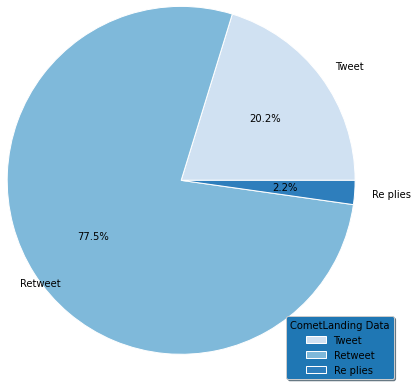

In [50]:
# https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.legend.html

# data
x = [len(tweet_only_df), len(retweet_only_df), len(raw_total_replies_df)]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(3, 3), labels=["Tweet", "Retweet", "Re plies"],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
       autopct="%1.1f%%")

legend = ax.legend(loc='best', bbox_to_anchor=(1, -0.6, 0.5, 0.5),
                   shadow=True, fontsize='medium', title="CometLanding Data")


# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()


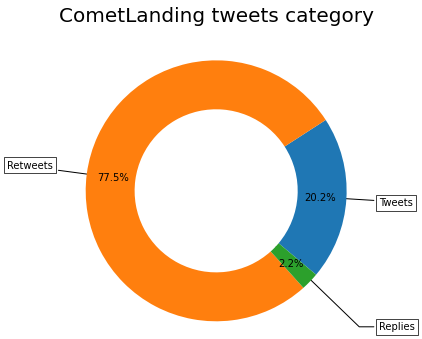

In [51]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = ["Tweets",
         "Retweets",
         "Replies"]

data = [len(tweet_only_df), len(retweet_only_df), len(raw_total_replies_df)]

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%", pctdistance=0.8,
                                  radius=2, center=(0, 0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("CometLanding tweets category", y=1.5,
             fontdict={"fontsize": 20})

plt.show()


In [52]:
date_raw = df[df['created_at'].apply(
    lambda x: True if re.search('^2014-11-12', str(x)) else False)]


In [53]:
date_raw


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
4056,532671396942344192,2553_3,RT @T4914T: Touchdown! My new address: 67P! #C...,2014-11-12 23:08:52+00:00,NaN,en,NaN,NaN,2881297946,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5272435722...,19,30,http://twitter.com/2553_3/statuses/53267139694...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
4057,532671395827048448,Tim_A_Roberts,Fuck you #CometLanding ...I've just landed on ...,2014-11-12 23:08:51+00:00,NaN,en,NaN,NaN,22677215,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5299272572...,2558,2056,http://twitter.com/Tim_A_Roberts/statuses/5326...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4058,532671394757103617,ies59192,#CometLanding which is better pokerstars or fu...,2014-11-12 23:08:51+00:00,NaN,zh-cn,NaN,NaN,2594606664,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,31,22,http://twitter.com/ies59192/statuses/532671394...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
4059,532671392815542273,santaleman,"RT @esa: ""Maybe today we didn't just land once...",2014-11-12 23:08:51+00:00,NaN,es,NaN,NaN,302594916,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1630988192...,625,839,http://twitter.com/santaleman/statuses/5326713...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter Web Client,Twitter
4060,532671387790757888,miarmc,Pink Floyd-ish RT â€œ@mashable: Listen to the ...,2014-11-12 23:08:50+00:00,NaN,en,972651,mashable,77091766,532579352094195000,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/5262001082...,4096,4279,http://twitter.com/miarmc/statuses/53267138779...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [54]:
date = date_raw.set_index('created_at').groupby(pd.Grouper(freq='H'))


In [55]:
date.count()["id_str"]


created_at
2014-11-12 09:00:00+00:00    9819
2014-11-12 10:00:00+00:00    5240
2014-11-12 11:00:00+00:00    5827
2014-11-12 12:00:00+00:00    6362
2014-11-12 13:00:00+00:00    5159
2014-11-12 14:00:00+00:00    2103
2014-11-12 15:00:00+00:00    5715
2014-11-12 16:00:00+00:00    5915
2014-11-12 17:00:00+00:00    5910
2014-11-12 18:00:00+00:00    5903
2014-11-12 19:00:00+00:00    3529
2014-11-12 20:00:00+00:00    3776
2014-11-12 21:00:00+00:00    2116
2014-11-12 22:00:00+00:00    4508
2014-11-12 23:00:00+00:00    1369
Freq: H, Name: id_str, dtype: int64

In [56]:
date_labels = [str(ts.strftime("%H"))
               for ts in date.count()["id_str"].index.tolist()]


In [57]:
date_data = date.count()["id_str"].tolist()


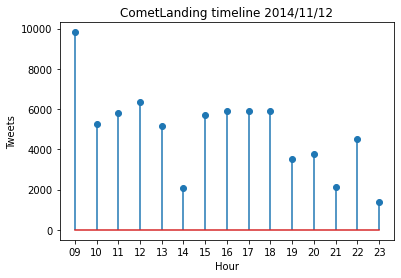

In [58]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/stem_plot.html
y = date_data
x = date_labels

plt.title("CometLanding timeline 2014/11/12")
plt.xlabel("Hour")
plt.ylabel("Tweets")

plt.stem(x, y)
plt.show()


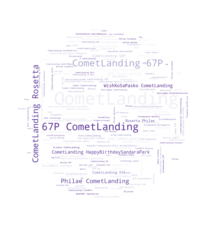

In [59]:
def createWordCloud(allHashtags):
    mask = np.array(Image.open('../moon.jpg'))
    text = " ".join(x.split()[0] for x in allHashtags)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 12000,
                          height = 9000,
                          #max_words = 200,
                          colormap = 'Purples',
                          mask = mask,
                          background_color = 'white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file('../images/wordCloud.png')

# Not sure if CometLanding hashtag should be in cloud but it can be searched for in the file and removed before creating wordcloud.
# Example usage
createWordCloud(getListOfAllHashTags())


In [60]:
df['applications'].unique()

array(['Twitter', 'IFTTT', 'Buffer', 'TweetDeck', 'AllFilmBot',
       'Tweetbot for Mac', 'Gwittr Writer', 'dlvr.it', 'Hootsuite',
       'GatorBot', 'Mobile Web (M5)', 'Tweetbot for iÎŸS', 'Instagram',
       'my-app-z', 'Mobile Web (M2)', 'HubSpot', 'TweetAdder v4',
       'Echofon', 'OS X', 'Google', 'TweetCaster for Android',
       'Carbon for Android', 'Dat post', '423Diotima', 'iOS', 'Flipboard',
       'PlumeÂ\xa0forÂ\xa0Android', 'botly', 'MetroTwit', 'YoruFukurou',
       'Favstar.FM', 'RNAutoRetweet', ' Tweedle', 'Sprout Social',
       'RoundTeam', 'ScienceApp', 'Crowdbooster', 'SocialChorus',
       'Tweetium for Windows', 'twicca', 'SemanticEarth',
       'Twidere for Android #2', 'Microsoft SMB', 'Facebook',
       'TheWorld for iOS', 'Tumblr', 'feedly cloud', 'TTYtter', 'Polly',
       'twittbot.net', 'Tweetings for Android', 'twi_api_for_farm',
       'Post with Klout', 'Tweetian for Sailfish OS', 'yoono', 'Seesmic',
       'BBotMaker - Bot Ã\xa0 mots-clÃ©s', 'Choqok'

In [61]:
spec_app_raw = df.groupby(["specific_applications"]).agg(["count"])["id_str"]
app_raw = df.groupby(["applications"]).agg(["count"])["id_str"]

In [62]:
spec_app_sorted = spec_app_raw.sort_values(by="count",ascending=False)
app_sorted = app_raw.sort_values(by="count",ascending=False)

In [63]:
spec_app_raw

,count
specific_applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [64]:
spec_app_sorted

,count
specific_applications,
Twitter Web Client,27943
Twitter for iPhone,13750
Twitter for Android,12773
TweetDeck,4081
Twitter for iPad,3283
...,...
Tweet Offers,1
Tweet-this-page,1
MalelErkin,1


In [65]:
app_raw

,count
applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [66]:
app_sorted

,count
applications,
Twitter,62860
TweetDeck,4081
dlvr.it,1671
Tweetbot for iÎŸS,1055
Tweet Old Post,925
...,...
LF_ShindongSJd app,1
KuroTwi,1
KunzBot,1


In [67]:
top6_withdev = spec_app_sorted.head(6)["count"]
top6_app = app_sorted.head(6)["count"]

In [68]:
others_count = spec_app_sorted.sum() - spec_app_sorted.head(6).sum()
others_dict = {"Others": others_count[0]}
others = pd.Series(data=others_dict)
top7_withdev = pd.concat([top6_withdev, others]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [69]:
others_count_app = app_sorted.sum() - app_sorted.head(6).sum()
others_dict_app = {"Others": others_count_app[0]}
others_app = pd.Series(data=others_dict_app)
top7_app = pd.concat([top6_app, others_app]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [70]:
top7_withdev

Twitter Web Client     27943
Twitter for iPhone     13750
Twitter for Android    12773
TweetDeck               4081
Twitter for iPad        3283
dlvr.it                 1671
Others                 13806
dtype: int64

In [71]:
top7_app

Twitter              62860
TweetDeck             4081
dlvr.it               1671
Tweetbot for iÎŸS     1055
Tweet Old Post         925
Hootsuite              799
Others                5916
dtype: int64

In [72]:
others_count_app

count    5916
dtype: int64

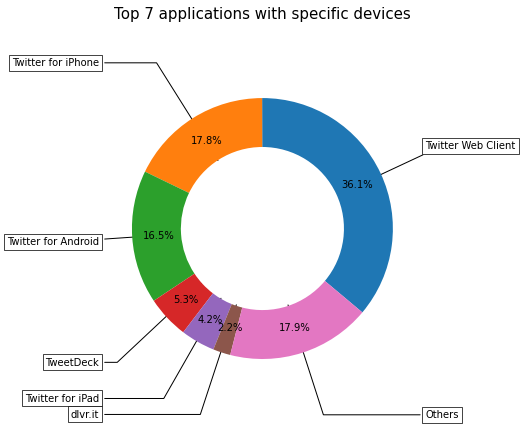

In [73]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = top7_withdev.keys().tolist()

data = top7_withdev.values.tolist()

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%",pctdistance=0.8, 
                                  radius=2, center=(0,0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 7 applications with specific devices",y=1.75,
             fontdict = {"fontsize":15})

plt.show()

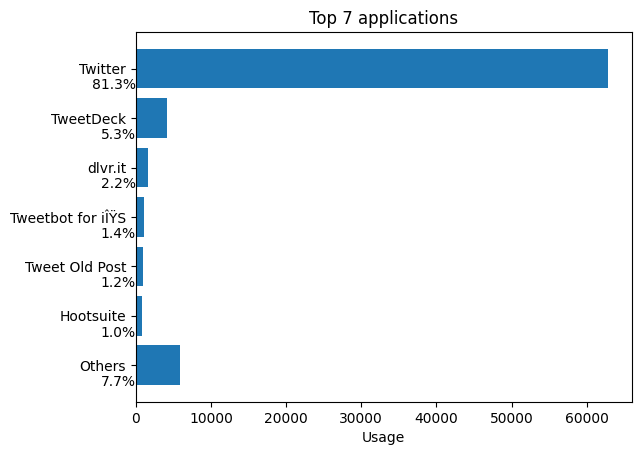

In [74]:
# https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib

label = top7_app.keys().tolist()

data = top7_app.values.tolist()


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = label
ax.barh(y_pos, data, align='center')
ax.set_yticks(y_pos, labels=label)
ax.invert_yaxis()  
ax.set_xlabel('Usage')
ax.set_title('Top 7 applications')

total = df["applications"].size

#Percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    percentage = '{:.1f}%'.format(100*p.get_width()/total)# change it to .11f to make it more specific
    x, y = p.get_xy() 
    ax.annotate(percentage, (x, y + height*1.02), ha='right')


plt.show()

In [75]:
df["applications"].size

77307